In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Deliverable
What are typical usage patterns for scooters in terms of time, location, and trip duration?

In [ ]:
#reading in necessary data

trips = pd.read_csv('../data/tripsgeo.csv')

In [ ]:
#cleaning and formatting data.

trips = trips.reset_index(drop=True)

In [ ]:
#creating a timedelta of the duration column

trips['tripduration'] = pd.to_timedelta(trips['tripduration'])

In [ ]:
#converting timedelta to minutes, an integer, which allows for efficient processing of graphs.

trips['minutes'] = trips['tripduration'] / pd.Timedelta(minutes=1)

In [ ]:
#subsetting data

bird = trips.loc[trips['companyname'] == 'Bird']
lime = trips.loc[trips['companyname'] == 'Lime']
jump = trips.loc[trips['companyname'] == 'JUMP']
lyft = trips.loc[trips['companyname'] == 'Lyft']
bolt = trips.loc[trips['companyname'] == 'Bolt Mobility']
spin = trips.loc[trips['companyname'] == 'SPIN']
gotcha = trips.loc[trips['companyname'] == 'Gotcha']

In [ ]:
#creating percentiles of the trips data to aid in filtering data for visualizations.

trips['duration_percentile'] = pd.qcut(trips.minutes, q=100)

# Method - Duration
Finding my cutoff for future graphs, there are a few trips that skew the graph quite a lot on the long end of durations. Selecting the bottom 99% of data allows me to include almost all of the data and effectively eliminate the outliers. The min of the 99%ile is 89.33333 minutes. Moving forward, all DURATION based graphs will only include durations less than 90 minutes or over 99% of the total data.

In [ ]:
trips.groupby(by='duration_percentile').describe().tail()

In [ ]:
#plotting histogram of trip duration distribution.

sns.histplot(data=trips, x='minutes', bins=45, binrange=[0, 90], color="red")
plt.title('Trip Duration Distribution')
plt.xlabel('Minutes')
plt.show()

#attaching choropleth of durations by zipcode where you can see average duration understandably increases as you leave the city center.

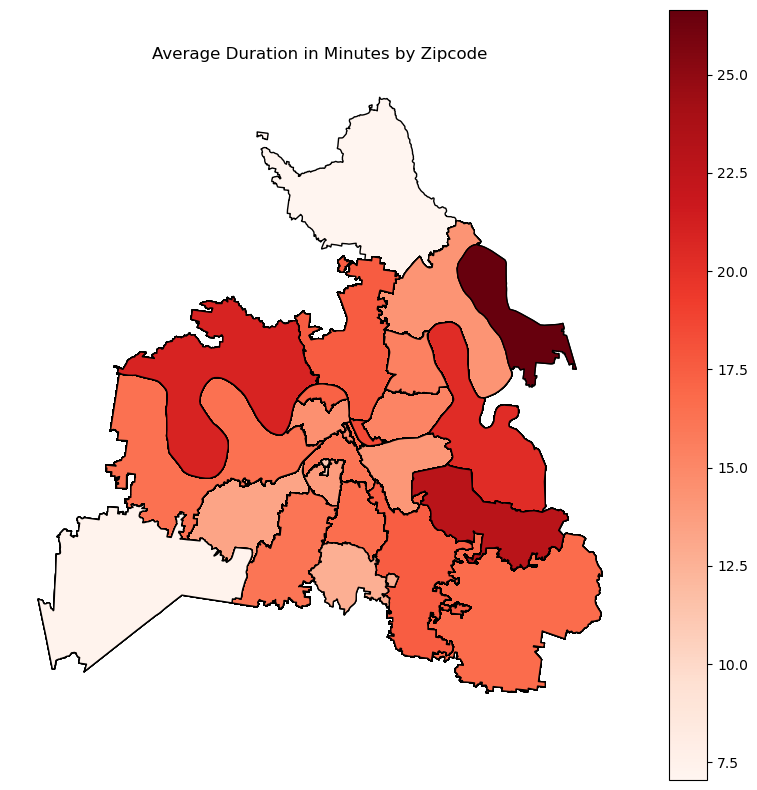

In [ ]:
#Finding my cutoffs for distance.

trips['distance_percentile'] = pd.qcut(trips.tripdistance, q=100, duplicates='drop')
trips.groupby(by='distance_percentile').tripdistance.describe()

In [ ]:
#Plotting histogram of trip distance distribution.

sns.histplot(data=trips, x='tripdistance', bins=45, binrange=[3.9, 29248.6886], color="green")
plt.title('Trip Distance Distribution')
plt.xlabel('Distance in Feet')
plt.show()

#Attaching choropleth of distances by zipcode, where you can see that average distance increases as you get farther away from city center.

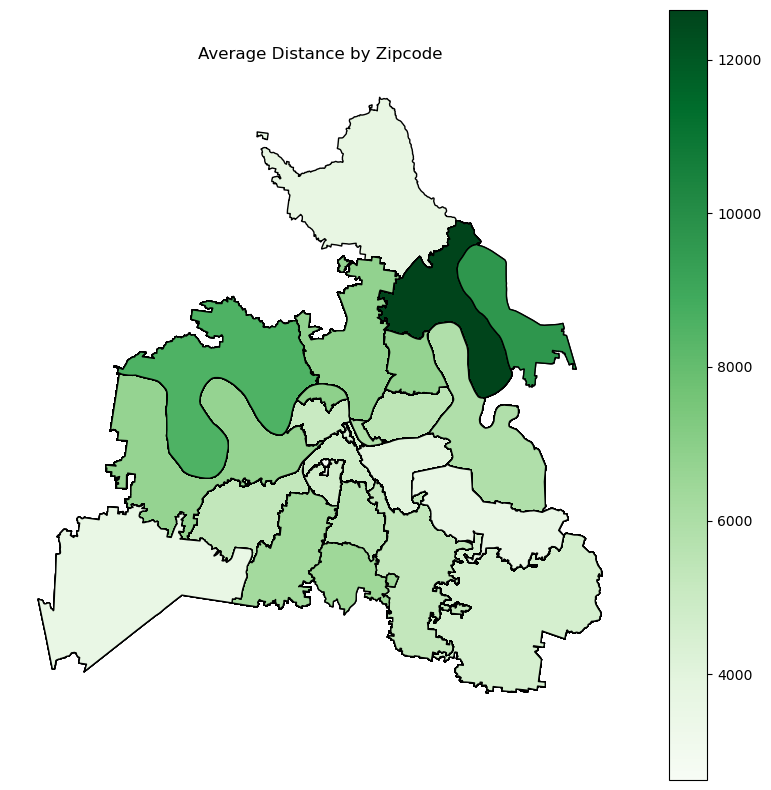

# Method - Distance
Investigated outliers in the distance columns. There are 67359 rows with a trip distance less than 4 feet, skewing the data heavily to the left. This accounts for ~13% of the rows and will NOT be considered for display purposes. It could be assumed these were people activating the scooter to 'check out the technology' or otherwise anomalous data.

Additionally, the longest distances still skew the results pretty heavily towards the right, with the top ~1% of data having a range of 29255 to 105022 feet. These will also NOT be included.

My graphing cutoffs for distance will be established at 3.9ft and 29248.68886ft. This retains ~86% of the data and presents a better image of what the distribution really looks like.

In [ ]:
#reading in a .csv I created of trips by day, hour, and minute for each zipcode in the Nashville-Davidson area.

tripstime = pd.read_csv('../data/tripsbytimeandzipcode.csv')
tripstime.info()

In [ ]:
#creating datetime object of date

tripstime['date'] = pd.to_datetime(tripstime['date'])

In [ ]:
#extracting day_name from datetime object

tripstime['weekday'] = tripstime['date'].dt.day_name()

In [ ]:
#creating dictionary of days

daydict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

In [ ]:
tripsweekday = pd.DataFrame(tripstime.groupby(by=['weekday', 'zip']).number_of_trips.sum())

In [ ]:
tripsweekday.columns = ['totaltrips']

In [ ]:
tripsweekday = tripsweekday.reset_index()
tripsweekday = tripsweekday[['weekday', 'totaltrips', 'zip']]

In [ ]:
tripsweekdayzip = pd.DataFrame(tripsweekday.groupby(by=['weekday', 'zip']).totaltrips.sum())